# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## Task 1: Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [22]:
# Header
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1b) Projection
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 dimensions (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a figure with 3 subplots, one for every possible combination of the dataset's  dimensions (X vs Y, Y vs Z, and Z vs X). Each of these plots shows a different 2D __projection__ of the 3D dataset. 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 
  
3. Make sure each subplot has a title

[-13.059  17.36   41.08 ]


Text(0.5, 1.0, 'Z vs X')

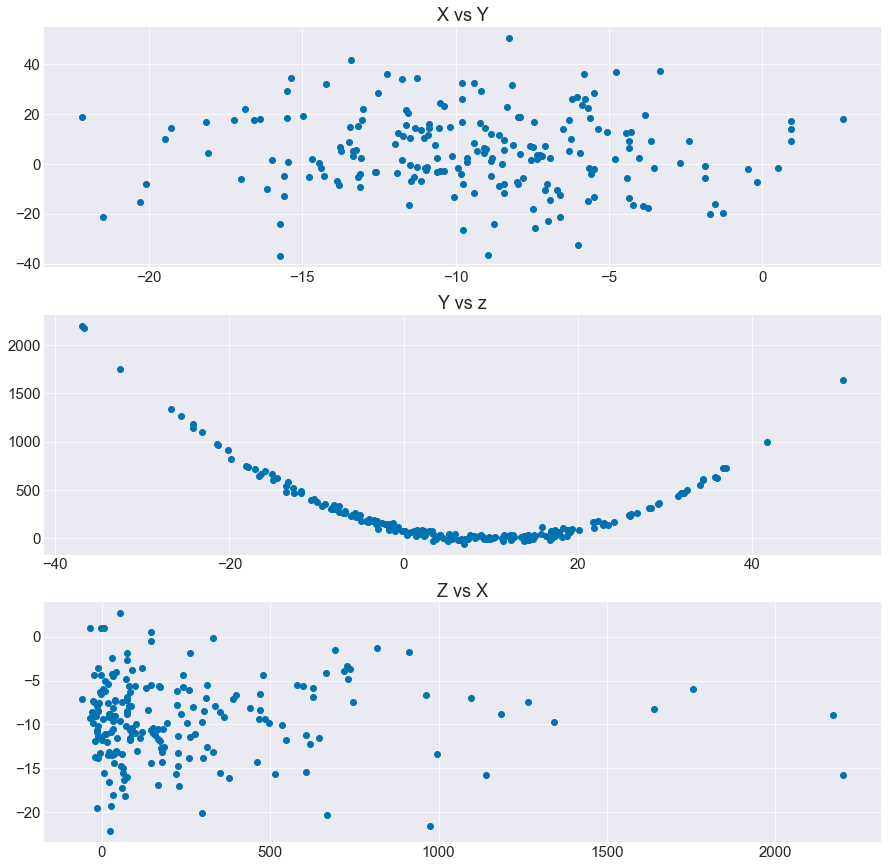

In [23]:
gauss_csv = np.genfromtxt("data/gauss_3d.csv", delimiter = ',')

print(gauss_csv[1])

gauss_csv.shape

fig, ax = plt.subplots(3,1, figsize = (15,15))

#subplots of X vs Y, Y vs Z, Z vs X

#X vs Y
ax[0].scatter(gauss_csv[:,0],gauss_csv[:,1])
ax[0].set_title("X vs Y")

#Y vs Z
ax[1].scatter(gauss_csv[:,1],gauss_csv[:,2])
ax[1].set_title("Y vs z")


#Z vs X
ax[2].scatter(gauss_csv[:,2],gauss_csv[:,0])
ax[2].set_title("Z vs X")



In [24]:
gauss_csv.shape


(200, 3)

### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [25]:
#creating a matrix of ones
homogenous_coord = np.ones((200,1))
print(homogenous_coord.shape)

gauss_csv = np.hstack((gauss_csv, homogenous_coord))
print(gauss_csv.shape)

(200, 1)
(200, 4)


## Task 2: Translation

### 2a) Create the Translation Matrix

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print your matrix


In [26]:
#create indentity matrix and update last column with 0, 25, -1000, 0
trans_mat = np.eye(4, dtype = int)
trans_mat[:,3] = [0,25,-1000,1]

print(trans_mat)

[[    1     0     0     0]
 [    0     1     0    25]
 [    0     0     1 -1000]
 [    0     0     0     1]]


### 2b) Translate Data and Visualize Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and translated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the translated data in different colors.
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

In [28]:
#transpose gauss_csv
gauss_csv_T = gauss_csv.T

#multiply transformation matrix with gauss_csv_T
gauss_translated_T = trans_mat@gauss_csv_T

print(trans_mat.shape)
print(gauss_csv_T.shape)

#Transpose back
gauss_translated = gauss_translated_T.T

print(gauss_translated[0:5])

(4, 4)
(4, 200)
[[  -1.878   23.987 -926.373    1.   ]
 [ -13.059   42.36  -958.92     1.   ]
 [ -12.641   21.565 -825.331    1.   ]
 [ -15.365   59.323 -392.561    1.   ]
 [  -5.673   10.021 -401.607    1.   ]]


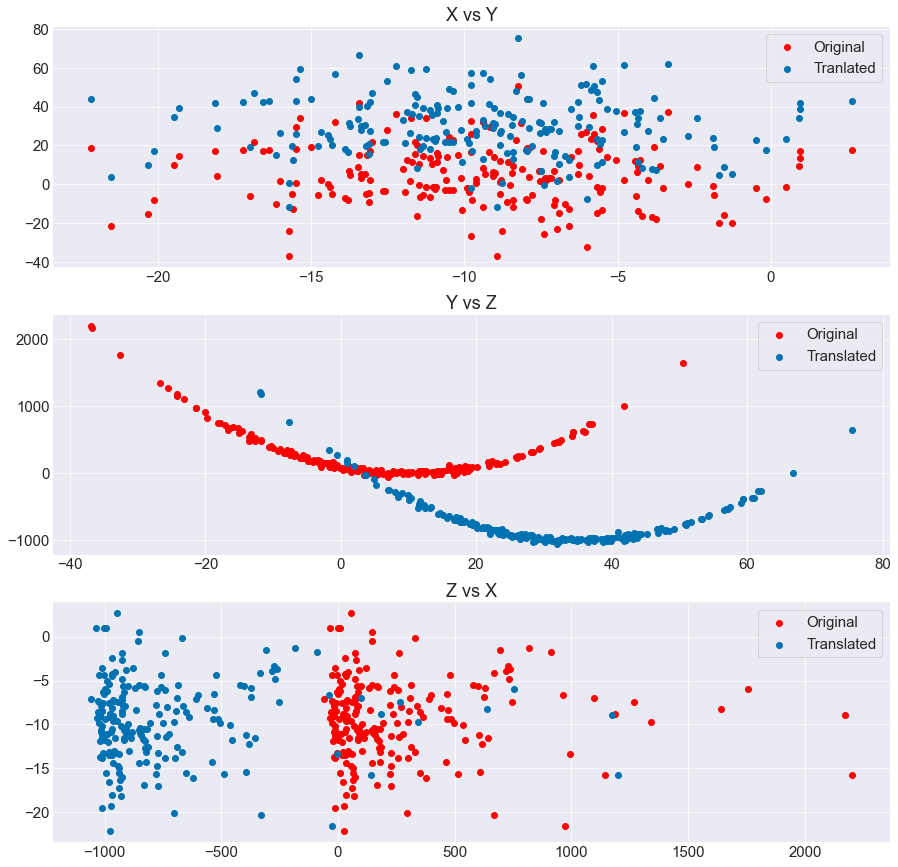

In [32]:
#Visualize results

fig, ax = plt.subplots(3,1, figsize = (15,15))


#Plots for untranslated data

#X vs Y
ax[0].scatter(gauss_csv[:,0],gauss_csv[:,1],color = 'r', label = 'Original')
ax[0].set_title("X vs Y")
ax[0].legend(loc = 'upper right',frameon = True)


#Y vs Z
ax[1].scatter(gauss_csv[:,1],gauss_csv[:,2],color = 'r', label = 'Original')
ax[1].set_title("Y vs Z")
ax[1].legend(loc = 'upper right',frameon = True)





#Z vs X
ax[2].scatter(gauss_csv[:,2],gauss_csv[:,0], color = 'r', label = 'Original')
ax[2].set_title("Z vs X")
ax[2].legend(loc = 'upper right',frameon = True)


#Plots for translated data
#X vs Y
ax[0].scatter(gauss_translated[:,0],gauss_translated[:,1],label = 'Tranlated')
ax[0].set_title("X vs Y")
ax[0].legend(loc = 'upper right',frameon=True)



#Y vs Z
ax[1].scatter(gauss_translated[:,1],gauss_translated[:,2],label = 'Translated')
ax[1].set_title("Y vs Z")
ax[1].legend(loc = 'upper right',frameon = True)

#Z vs X
ax[2].scatter(gauss_translated[:,2],gauss_translated[:,0], label = 'Translated')
ax[2].set_title("Z vs X")
ax[2].legend(loc = 'upper right',frameon = True)



## Task 3: Scale

### 3a) Create a Scaling Matrix

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print the matrix

In [43]:
#Scaling Matrix
s_matrix = np.eye(4, dtype = float)
np.fill_diagonal(s_matrix, [3,0,0.1,1])
print(s_matrix)

[[3.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  1. ]]


### 3b) Scale Data and Visualize the Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and scaled results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the scaled data in different colors.
  - <i>If you implemented a function in the previous step, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

In [45]:
#Scaled gauss
gauss_scaled_T = s_matrix@gauss_csv_T
gauss_scaled = gauss_scaled_T.T
print(gauss_scaled)


[[ -5.634    0.       7.3627   1.    ]
 [-39.177    0.       4.108    1.    ]
 [-37.923    0.      17.4669   1.    ]
 [-46.095    0.      60.7439   1.    ]
 [-17.019    0.      59.8393   1.    ]
 [-64.524    0.      97.377    1.    ]
 [ -3.828    0.      81.7145   1.    ]
 [-41.418    0.      30.1274   1.    ]
 [-25.215    0.      47.0952   1.    ]
 [-33.741    0.      60.5098   1.    ]
 [ -8.067    0.       7.5917   1.    ]
 [-60.903    0.      66.8435   1.    ]
 [-34.836    0.      16.6265   1.    ]
 [-35.76     0.      17.3865   1.    ]
 [-12.993    0.      47.9397   1.    ]
 [-46.497    0.       0.6781   1.    ]
 [-32.586    0.      -1.552    1.    ]
 [-43.167    0.      14.5707   1.    ]
 [-29.367    0.      25.2389   1.    ]
 [-21.258    0.      -5.7971   1.    ]
 [-46.509    0.      35.0007   1.    ]
 [-12.828    0.       3.1791   1.    ]
 [-16.476    0.      31.3531   1.    ]
 [-22.464    0.      -2.2467   1.    ]
 [-16.488    0.      57.9077   1.    ]
 [-40.257    0.      99.3

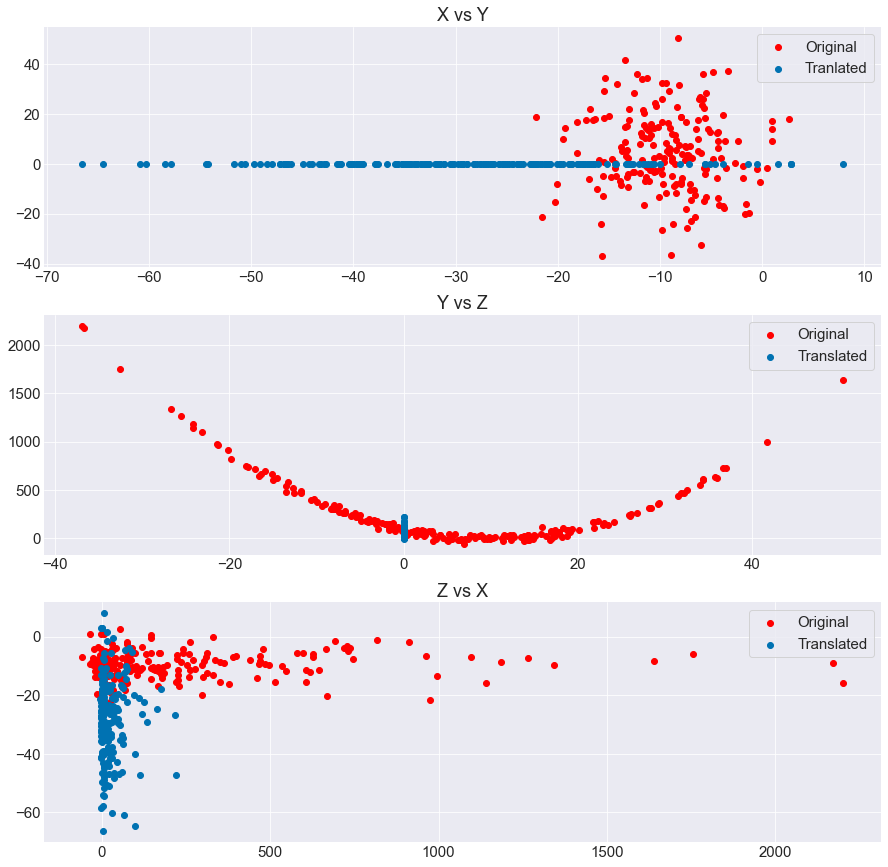

In [46]:
#Visualize results

fig, ax = plt.subplots(3,1, figsize = (15,15))


#Plots for original data

#X vs Y
ax[0].scatter(gauss_csv[:,0],gauss_csv[:,1],color = 'r', label = 'Original')
ax[0].set_title("X vs Y")
ax[0].legend(loc = 'upper right',frameon = True)


#Y vs Z
ax[1].scatter(gauss_csv[:,1],gauss_csv[:,2],color = 'r', label = 'Original')
ax[1].set_title("Y vs Z")
ax[1].legend(loc = 'upper right',frameon = True)


#Z vs X
ax[2].scatter(gauss_csv[:,2],gauss_csv[:,0], color = 'r', label = 'Original')
ax[2].set_title("Z vs X")
ax[2].legend(loc = 'upper right',frameon = True)


#Plots for scaled data
#X vs Y
ax[0].scatter(gauss_scaled[:,0],gauss_scaled[:,1],label = 'Tranlated')
ax[0].set_title("X vs Y")
ax[0].legend(loc = 'upper right',frameon=True)



#Y vs Z
ax[1].scatter(gauss_scaled[:,1],gauss_scaled[:,2],label = 'Translated')
ax[1].set_title("Y vs Z")
ax[1].legend(loc = 'upper right',frameon = True)

#Z vs X
ax[2].scatter(gauss_scaled[:,2],gauss_scaled[:,0], label = 'Translated')
ax[2].set_title("Z vs X")
ax[2].legend(loc = 'upper right',frameon = True)

